In [1]:
# Import libraries
from __future__ import print_function
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.nn.functional import sigmoid, relu
from scipy.cluster.hierarchy import dendrogram, linkage
from functions import *
from models import *

In [3]:
df = pd.read_csv('SemanticCognitionRecipes/data/featurized_condensed_2.csv')

df = df.drop(columns=['Unnamed: 0', 'Ingredients'])
df = df.set_index('ID')
cuisines = list(set(df['Cuisine']))

binary_cuisines = {}
counter = 0
for i in cuisines:
    length = np.zeros(len(cuisines))
    length[counter] = 1
    length = length.tolist()
    counter += 1
    binary_cuisines[i] = length

lists = {}
for i in df.iterrows():
    i[1][0] = binary_cuisines[i[1][0]]
    lists[i[0]] = i[1][0]+i[1][1:].get_values().tolist()

ncuisines = len(df['Cuisine'].unique())
print(ncuisines)
print(df['Cuisine'].unique())
ntastes = len(df.columns[1:7])
print(ntastes)
print(np.array(df.columns[1:7]))
ningredients = len(df.columns[7:])
print(ningredients)
print(df.columns[7:])

binary_df = pd.DataFrame(lists).T
input_pats = binary_df.iloc[:,:ncuisines+ntastes]
input_pats = torch.tensor(np.array(input_pats),dtype=torch.float)
output_pats = binary_df.iloc[:,ncuisines+ntastes:]
output_pats = torch.tensor(np.array(output_pats),dtype=torch.float)
N_this = input_pats.shape[0] # number of training patterns
input_v = input_pats[0,:].numpy().astype('bool')
output_v = output_pats[0,:].numpy().astype('bool')

20
['brazilian' 'british' 'cajun_creole' 'chinese' 'filipino' 'french'
 'greek' 'indian' 'irish' 'italian' 'jamaican' 'japanese' 'korean'
 'mexican' 'moroccan' 'russian' 'southern_us' 'spanish' 'thai'
 'vietnamese']
6
['veg' 'vegan' 'dessert' 'spicy' 'drink' 'alcohol']
596
Index(['Unnamed: 10', 'grated parmesan cheese', 'Italian Dressing', 'browning',
       'baking powder', 'chili ', 'sunflower kernels', 'active  yeast',
       'onions', ' almonds',
       ...
       'chili', 'cardamom', 'bouillon cube', '  mint', 'ginger ',
       'corn tortillas', 'cauliflower', ' thyme', 'spices', 'corn syrup'],
      dtype='object', length=596)


In [4]:
cuisine_names = np.array(df['Cuisine'].unique()).reshape(-1, 1)
taste_names = np.array(df.columns[1:7]).reshape(-1, 1)

item_names = np.append(cuisine_names, taste_names).reshape(-1, 1)
output_shape = output_pats.shape[1]

In [5]:
learning_rate = 0.1
criterion = nn.MSELoss() # mean squared error loss function
mynet = BaselineFeedForward(rep_size = 26, hidden_size = 26, ncuisines = ncuisines, ntastes = ntastes, output_shape = output_shape)
optimizer_this = torch.optim.SGD(mynet.parameters(), lr=learning_rate) # stochastic gradient descent

nepochs_phase1 = 500
nepochs_phase2 = 2000
nepochs_phase3 = 5000
epoch_count = 0
epoch_count = train(mynet, epoch_count, N = N_this, input_pats = input_pats, 
                    output_pats = output_pats, 
                    optimizer = optimizer_this, 
                    nepochs_additional = nepochs_phase1)

rep1_ = get_rep(mynet, item_names)

epoch_count = train(mynet, epoch_count, N = N_this, input_pats = input_pats, 
                    output_pats = output_pats, 
                    optimizer = optimizer_this, 
                    nepochs_additional = nepochs_phase2-nepochs_phase1)

rep2_ = get_rep(mynet, item_names)

epoch_count = train(mynet, epoch_count, N = N_this, input_pats = input_pats, 
                    output_pats = output_pats, 
                    optimizer = optimizer_this, 
                    nepochs_additional = nepochs_phase3-nepochs_phase2)

rep3_ = get_rep(mynet, item_names)


/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch 0 loss 0.25
epoch 500 loss 0.017
epoch 1000 loss 0.016
epoch 1500 loss 0.016
epoch 2000 loss 0.016
epoch 2500 loss 0.016
epoch 3000 loss 0.016
epoch 3500 loss 0.016
epoch 4000 loss 0.015
epoch 4500 loss 0.015


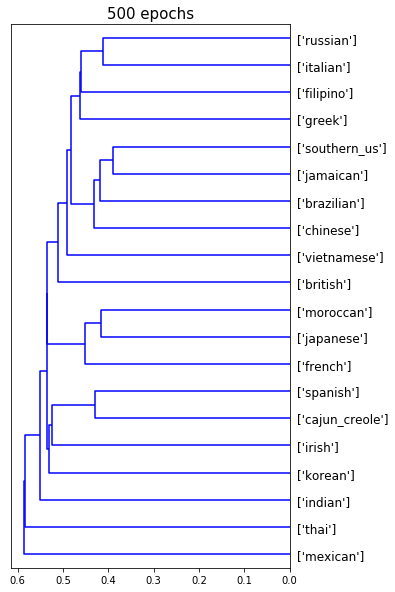

In [6]:
plot_dendo(rep1_[:20], rep1_[:20], rep1_[:20], 
           cuisine_names, x_rotation = 0, 
           y_rotation = 0, epoch_title = "500")

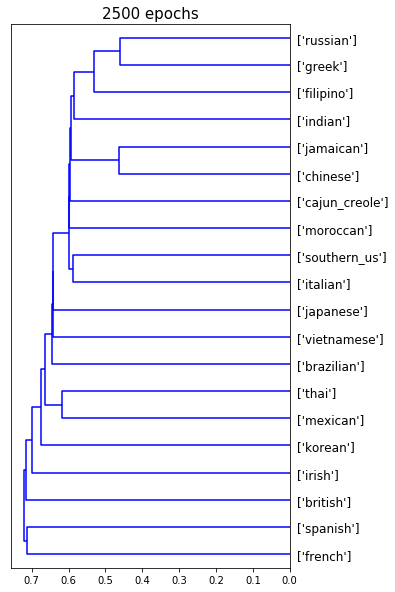

In [7]:
plot_dendo(rep2_[:20], rep2_[:20], rep2_[:20], 
           cuisine_names, x_rotation = 0, 
           y_rotation = 0, epoch_title = "2500")

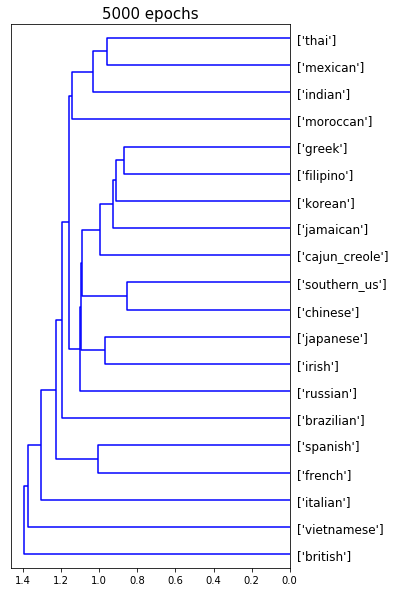

In [8]:
plot_dendo(rep3_[:20], rep3_[:20], rep3_[:20], 
           cuisine_names, x_rotation = 0, 
           y_rotation = 0, epoch_title = "5000")